<a href="https://colab.research.google.com/github/ajithpious/Colab-Notebooks/blob/main/Automatic_Threshold_Adjustment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data Loading

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from bokeh.plotting import figure, show
import bokeh.io
import pickle
bokeh.io.output_notebook()

In [ ]:
pd.set_option('display.max_rows', 1000)

In [ ]:
columns = ['scada_ws_gearbox_oil_temp', 'scada_ws_last_brake_torque',
       'vib_frame_accel', 'scada_ws_kvar', 'scada_ws_wind_speed_average',
       'scada_ws_manual_mode_active', 'scada_ws_last_brake_rpm',
       'scada_ws_yaw_turn_counter', 'scada_ws_shutdown_summation',
       'scada_ws_kw', 'prox_hub_min_prox', 'vib_gearbox_accel',
       'scada_ws_rotor_speed', 'prox_hub_diff_prox',
       'scada_ws_alarm_summation', 'prox_hub_max_prox', 'vib_shaft_accel',
       'scada_ws_generator_speed', 'scada_ws_wind_speed',
       'prox_hub_proximity']

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Works/Iceni/Data/data_131.txt',names=columns)
data_df = df[df['scada_ws_gearbox_oil_temp']!=-1234]

In [ ]:
df[df['scada_ws_gearbox_oil_temp']==-1234].index

Int64Index([ 42641,  42642,  42643,  42644,  42645,  42646,  42647,  42648,
             42649,  42650,
            ...
            110925, 110926, 110927, 110928, 110929, 110930, 110931, 110932,
            110933, 110934],
           dtype='int64', length=17156)

In [ ]:
y_df = data_df['vib_frame_accel']
x_df = data_df.drop(columns=['vib_frame_accel','vib_shaft_accel','vib_gearbox_accel'])

NameError: name 'data_df' is not defined

In [ ]:
x_df

,scada_ws_gearbox_oil_temp,scada_ws_last_brake_torque,scada_ws_kvar,scada_ws_wind_speed_average,scada_ws_manual_mode_active,scada_ws_last_brake_rpm,scada_ws_yaw_turn_counter,scada_ws_shutdown_summation,scada_ws_kw,prox_hub_min_prox,scada_ws_rotor_speed,prox_hub_diff_prox,scada_ws_alarm_summation,prox_hub_max_prox,scada_ws_generator_speed,scada_ws_wind_speed,prox_hub_proximity
0,40.0,931.837,-14.5,3.7,0.0,1534.0,0.0,0.0,2.0,4.62,150.1,2.26,1.0,6.87,1501.0,3.8,5.94
1,40.1,931.837,-14.4,4.1,0.0,1534.0,0.0,0.0,6.1,4.61,150.0,2.25,1.0,6.86,1499.5,4.3,5.94
2,40.3,931.837,-13.2,3.8,0.0,1534.0,0.0,0.0,2.1,4.63,149.8,2.24,1.0,6.87,1498.3,3.7,5.95
3,40.2,931.837,-19.2,3.6,0.0,1534.0,0.0,0.0,0.6,4.62,149.6,2.26,1.0,6.88,1495.9,3.6,5.95
4,40.0,931.837,-3.6,2.6,0.0,1534.0,0.0,0.0,-0.6,4.61,136.4,2.23,1.0,6.84,1363.8,2.7,5.91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111193,47.7,0.000,-16.9,4.6,0.0,0.0,4.0,0.0,7.7,4.23,150.0,2.23,1.0,6.46,1500.3,4.6,5.50
111194,47.7,0.000,-16.7,5.2,0.0,0.0,4.0,0.0,16.6,4.23,150.1,2.22,1.0,6.45,1501.3,5.4,5.49
111195,48.3,0.000,-16.8,5.4,0.0,0.0,4.0,0.0,17.6,4.24,150.1,2.24,1.0,6.48,1500.8,5.4,5.51
111196,48.7,0.000,-16.4,5.6,0.0,0.0,4.0,0.0,19.2,4.22,150.2,2.23,1.0,6.46,1502.2,5.6,5.50


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_df, y_df, test_size=0.33, random_state=42)

In [ ]:
x_train.describe()

,scada_ws_gearbox_oil_temp,scada_ws_last_brake_torque,scada_ws_kvar,scada_ws_wind_speed_average,scada_ws_manual_mode_active,scada_ws_last_brake_rpm,scada_ws_yaw_turn_counter,scada_ws_shutdown_summation,scada_ws_kw,prox_hub_min_prox,scada_ws_rotor_speed,prox_hub_diff_prox,scada_ws_alarm_summation,prox_hub_max_prox,scada_ws_generator_speed,scada_ws_wind_speed,prox_hub_proximity
count,63008.000000,63008.000000,63008.000000,63008.000000,63008.000000,63008.000000,63008.000000,63008.000000,63008.000000,63008.000000,63008.000000,63008.000000,63008.000000,63008.000000,63008.000000,63008.000000,63008.000000
mean,44.522202,355.434347,-12.692537,4.353117,0.009253,448.990271,0.797565,0.010554,14.916692,4.754856,110.825010,1.766900,0.293915,6.521767,1108.541320,4.401679,5.768126
std,12.012021,566.885894,10.194656,3.000585,0.095746,702.952709,1.622992,0.102191,23.361421,0.581507,60.988163,0.830223,0.455557,0.666510,609.166153,3.003274,0.487276
min,4.900000,0.000000,-77.200000,0.000000,0.000000,0.000000,-4.000000,0.000000,-2.400000,3.410000,0.000000,0.070000,0.000000,3.900000,0.000000,0.000000,3.840000
25%,37.800000,0.000000,-19.000000,2.200000,0.000000,0.000000,0.000000,0.000000,0.000000,4.400000,80.200000,1.830000,0.000000,6.330000,802.700000,2.300000,5.520000
50%,45.800000,0.000000,-16.100000,3.800000,0.000000,0.000000,1.000000,0.000000,2.600000,4.630000,149.900000,2.220000,0.000000,6.670000,1499.100000,3.900000,5.810000
75%,53.000000,1107.730000,0.000000,5.800000,0.000000,1505.000000,2.000000,0.000000,20.600000,4.920000,150.300000,2.260000,1.000000,6.940000,1503.300000,5.900000,6.080000
max,70.500000,1387.130000,1.200000,23.900000,1.000000,1733.000000,8.000000,1.000000,103.200000,7.370000,152.500000,2.390000,1.000000,8.010000,1524.600000,24.500000,7.480000


In [ ]:
# x_train.plot(kind="density",subplots=True,sharex=False,figsize=(10,40))

#Data Preprocessing

In [ ]:
x_train.describe()

,scada_ws_gearbox_oil_temp,scada_ws_last_brake_torque,scada_ws_kvar,scada_ws_wind_speed_average,scada_ws_manual_mode_active,scada_ws_last_brake_rpm,scada_ws_yaw_turn_counter,scada_ws_shutdown_summation,scada_ws_kw,prox_hub_min_prox,scada_ws_rotor_speed,prox_hub_diff_prox,scada_ws_alarm_summation,prox_hub_max_prox,scada_ws_generator_speed,scada_ws_wind_speed,prox_hub_proximity
count,63008.000000,63008.000000,63008.000000,63008.000000,63008.000000,63008.000000,63008.000000,63008.000000,63008.000000,63008.000000,63008.000000,63008.000000,63008.000000,63008.000000,63008.000000,63008.000000,63008.000000
mean,44.522202,355.434347,-12.692537,4.353117,0.009253,448.990271,0.797565,0.010554,14.916692,4.754856,110.825010,1.766900,0.293915,6.521767,1108.541320,4.401679,5.768126
std,12.012021,566.885894,10.194656,3.000585,0.095746,702.952709,1.622992,0.102191,23.361421,0.581507,60.988163,0.830223,0.455557,0.666510,609.166153,3.003274,0.487276
min,4.900000,0.000000,-77.200000,0.000000,0.000000,0.000000,-4.000000,0.000000,-2.400000,3.410000,0.000000,0.070000,0.000000,3.900000,0.000000,0.000000,3.840000
25%,37.800000,0.000000,-19.000000,2.200000,0.000000,0.000000,0.000000,0.000000,0.000000,4.400000,80.200000,1.830000,0.000000,6.330000,802.700000,2.300000,5.520000
50%,45.800000,0.000000,-16.100000,3.800000,0.000000,0.000000,1.000000,0.000000,2.600000,4.630000,149.900000,2.220000,0.000000,6.670000,1499.100000,3.900000,5.810000
75%,53.000000,1107.730000,0.000000,5.800000,0.000000,1505.000000,2.000000,0.000000,20.600000,4.920000,150.300000,2.260000,1.000000,6.940000,1503.300000,5.900000,6.080000
max,70.500000,1387.130000,1.200000,23.900000,1.000000,1733.000000,8.000000,1.000000,103.200000,7.370000,152.500000,2.390000,1.000000,8.010000,1524.600000,24.500000,7.480000


##Scaling

In [ ]:
from sklearn.preprocessing import  StandardScaler
ss=StandardScaler()
ss.fit(x_train)
x_scaled_train=pd.DataFrame(ss.transform(x_train),columns=x_train.columns)
x_scaled_train.shape

(63008, 17)

In [ ]:
ss.feature_names_in_

array(['scada_ws_gearbox_oil_temp', 'scada_ws_last_brake_torque',
       'scada_ws_kvar', 'scada_ws_wind_speed_average',
       'scada_ws_manual_mode_active', 'scada_ws_last_brake_rpm',
       'scada_ws_yaw_turn_counter', 'scada_ws_shutdown_summation',
       'scada_ws_kw', 'prox_hub_min_prox', 'scada_ws_rotor_speed',
       'prox_hub_diff_prox', 'scada_ws_alarm_summation',
       'prox_hub_max_prox', 'scada_ws_generator_speed',
       'scada_ws_wind_speed', 'prox_hub_proximity'], dtype=object)

In [ ]:
ss.mean_

array([ 4.45222019e+01,  3.55434347e+02, -1.26925375e+01,  4.35311706e+00,
        9.25279330e-03,  4.48990271e+02,  7.97565389e-01,  1.05542153e-02,
        1.49166915e+01,  4.75485637e+00,  1.10825010e+02,  1.76690023e+00,
        2.93915058e-01,  6.52176739e+00,  1.10854132e+03,  4.40167915e+00,
        5.76812595e+00])

In [ ]:
# x_scaled_train.plot(kind="density",subplots=True,sharex=False,figsize=(10,40))

In [ ]:
y_train.describe()

count    63008.000000
mean       218.227635
std        150.138661
min         97.460000
25%        115.510000
50%        217.120000
75%        252.630000
max       2108.640000
Name: vib_frame_accel, dtype: float64

In [ ]:
# scaling test data
x_scaled_test=pd.DataFrame(ss.transform(x_test),columns=x_test.columns)
x_scaled_test.shape

(31034, 17)

In [ ]:
x_scaled_test

,scada_ws_gearbox_oil_temp,scada_ws_last_brake_torque,scada_ws_kvar,scada_ws_wind_speed_average,scada_ws_manual_mode_active,scada_ws_last_brake_rpm,scada_ws_yaw_turn_counter,scada_ws_shutdown_summation,scada_ws_kw,prox_hub_min_prox,scada_ws_rotor_speed,prox_hub_diff_prox,scada_ws_alarm_summation,prox_hub_max_prox,scada_ws_generator_speed,scada_ws_wind_speed,prox_hub_proximity
0,0.780707,-0.626999,-0.285197,0.182260,-0.096640,-0.638726,0.124730,-0.10328,-0.214744,-0.919784,0.645622,0.581896,1.549950,-0.077670,0.645902,0.132630,-0.529737
1,0.855633,1.585492,-0.383288,0.682167,-0.096640,1.502261,0.740881,-0.10328,0.495835,-0.335091,0.652181,0.593941,-0.645182,0.447458,0.652469,0.632089,0.209070
2,-0.101749,1.585492,1.245029,-1.017515,-0.096640,1.502261,-1.723722,-0.10328,-0.638523,-0.850996,-1.817170,-1.935519,-0.645182,-3.138415,-1.819783,-0.966180,-2.910336
3,0.206278,-0.626999,-0.285197,-0.051029,-0.096640,-0.638726,0.124730,-0.10328,-0.308917,-1.865610,0.616108,0.413265,1.549950,-1.127926,0.616025,-0.000559,-1.904738
4,1.180310,-0.626999,-0.550044,0.815475,-0.096640,-0.638726,1.357032,-0.10328,0.825440,-0.679028,0.648901,0.581896,-0.645182,0.147385,0.650006,0.798575,-0.201378
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31029,-1.325533,1.327078,-0.481380,0.148933,-0.096640,1.526444,0.740881,-0.10328,-0.146255,0.576341,0.645622,0.654166,-0.645182,1.317670,0.646066,0.165927,1.440415
31030,-3.206996,1.413410,1.245029,-1.084170,10.347728,1.522177,-0.491421,9.68240,-0.638523,3.087079,-1.817170,-1.911428,-0.645182,0.312425,-1.819783,-1.032774,1.727728
31031,-0.318201,-0.626999,0.038505,-0.417628,-0.096640,-0.638726,0.740881,-0.10328,-0.681329,-0.128729,0.611189,0.593941,-0.645182,0.627502,0.612085,-0.433424,0.496384
31032,0.023127,1.585492,-0.285197,0.282242,-0.096640,1.502261,-1.107571,-0.10328,0.046372,0.559144,0.645622,0.654166,-0.645182,1.302666,0.646066,0.265819,1.419892


In [ ]:
ss

StandardScaler()

###Saving the scaling features

In [ ]:
from sklearn.preprocessing import  StandardScaler
x_train_real_data = x_train[['scada_ws_kvar','scada_ws_wind_speed_average','scada_ws_rotor_speed',
 'scada_ws_gearbox_oil_temp',
 'prox_hub_max_prox']]
ss_real=StandardScaler()
ss_real.fit(x_train_real_data)
ss_real.mean_
with open('/content/drive/MyDrive/Works/Iceni/ML/SavedModels/ML/RandomForest/rf_scaler.pkl','wb') as f:
    pickle.dump(ss_real,f)

In [ ]:
ss_real.mean_

array([-12.69253746,   4.35311706, 110.82500952,  44.52220194,
         6.52176739])

##correlation

In [ ]:
import seaborn as sns
corr_df=x_scaled_train.copy()

In [ ]:
corr_df

,scada_ws_gearbox_oil_temp,scada_ws_last_brake_torque,scada_ws_kvar,scada_ws_wind_speed_average,scada_ws_manual_mode_active,scada_ws_last_brake_rpm,scada_ws_yaw_turn_counter,scada_ws_shutdown_summation,scada_ws_kw,prox_hub_min_prox,scada_ws_rotor_speed,prox_hub_diff_prox,scada_ws_alarm_summation,prox_hub_max_prox,scada_ws_generator_speed,scada_ws_wind_speed,prox_hub_proximity
0,1.155335,-0.626999,-0.393098,0.548858,-0.09664,-0.638726,0.124730,-0.10328,0.491554,0.077633,0.650541,0.618031,-0.645182,0.837553,0.651648,0.632089,0.742653
1,0.156328,1.585492,1.245029,-1.450768,-0.09664,1.502261,-1.107571,-0.10328,-0.638523,-0.610241,-1.817170,-1.923474,-0.645182,-2.928364,-1.819783,-1.465639,-2.643545
2,0.264554,1.397304,-0.883554,-0.384300,-0.09664,1.499415,-1.107571,-0.10328,-0.655646,-0.145926,0.629225,0.581896,-0.645182,0.597494,0.632277,-0.400126,0.475861
3,0.897258,-0.626999,-0.746227,0.815475,-0.09664,-0.638726,0.124730,-0.10328,0.868246,0.129223,0.652181,0.654166,-0.645182,0.927575,0.653454,0.865170,0.886310
4,-0.542977,1.016796,0.627053,-0.517609,-0.09664,1.543515,-1.723722,-0.10328,-0.668487,-0.180320,0.506250,0.545761,1.549950,0.522476,0.505874,-0.533315,0.352727
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63003,-0.867655,1.585492,1.245029,-0.717571,-0.09664,1.502261,-2.339873,-0.10328,-0.638523,0.266798,-0.239803,0.208499,-0.645182,0.477465,-0.241383,-0.699802,0.434817
63004,0.988834,-0.626999,-0.402907,0.782148,-0.09664,-0.638726,-1.107571,-0.10328,0.658497,0.146420,0.653820,0.581896,-0.645182,0.852556,0.654439,0.765278,0.804220
63005,-0.984205,-0.626999,-0.530425,0.615513,-0.09664,-0.638726,0.124730,-0.10328,0.504396,0.112026,0.645622,0.654166,-0.645182,0.912571,0.646231,0.632089,0.865787
63006,0.081402,1.016796,-0.324434,0.482204,-0.09664,1.543515,-1.107571,-0.10328,0.294647,0.060436,0.647262,0.642121,1.549950,0.852556,0.647872,0.498900,0.804220


In [ ]:
# corr_mat=corr_df.corr()
# fig,ax=plt.subplots(figsize=(20,20))
# ax.matshow(corr_mat)
# ax.set_xticks(range(0,61))
# ax.set_yticks(range(0,61))
# plt.show()
# fig,ax=plt.subplots(figsize=(25,10))
# sns.heatmap(corr_mat,annot=True,ax=ax)

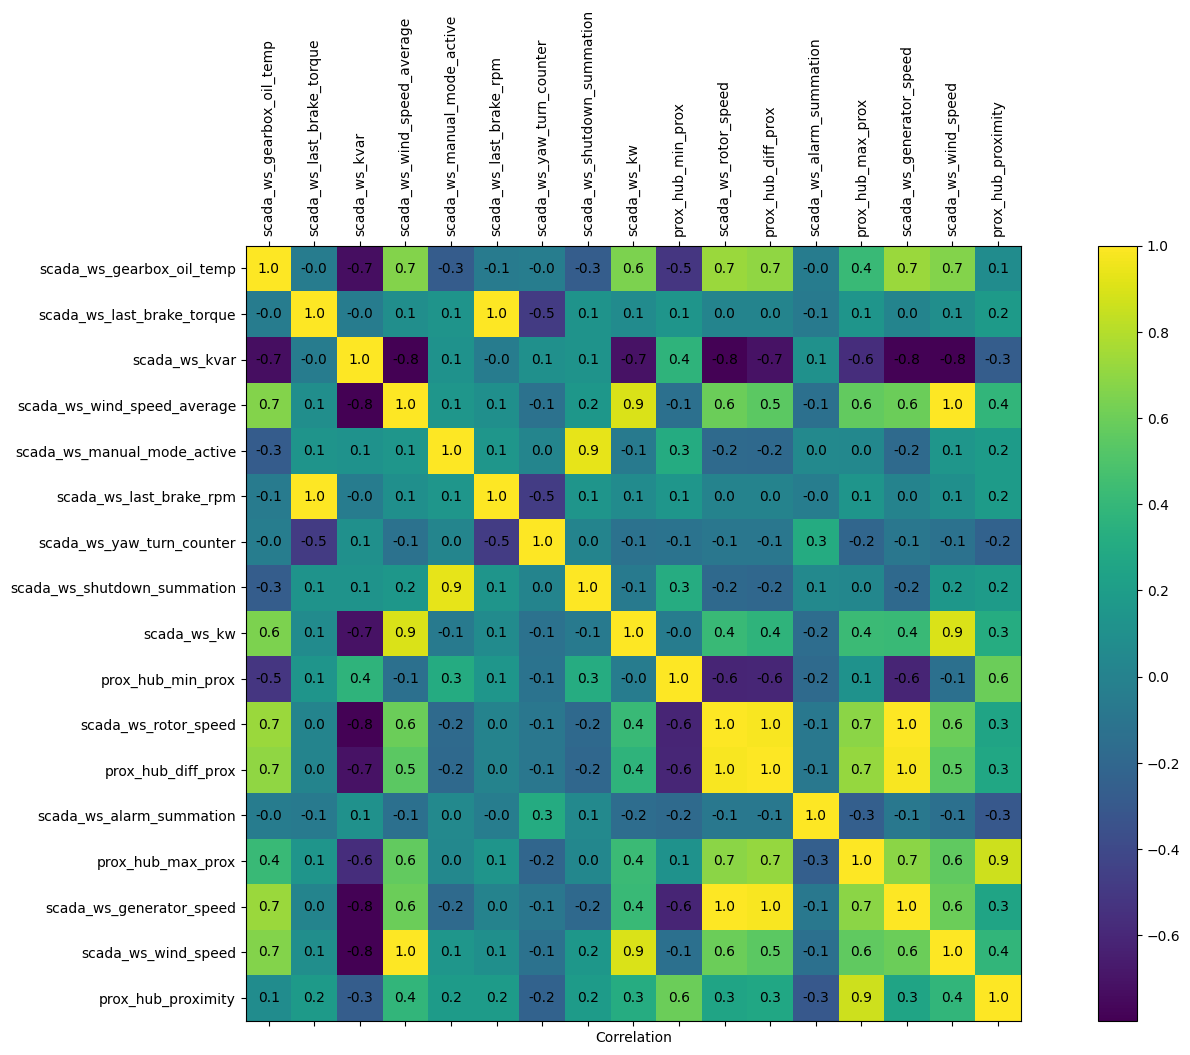

In [ ]:
# Finding the correlation between two variable in the dataframe
correlation=corr_df.corr()

# Plotting the correlation between different variables
plt.figure(figsize=(20,10))
plt.matshow(correlation,fignum=1)
plt.colorbar()
plt.xticks(range(len(correlation.columns)),correlation.columns.values,rotation=90)
plt.yticks(range(len(correlation.columns)),correlation.columns.values)
plt.xlabel('Correlation')
for (i, j), z in np.ndenumerate(correlation):
    plt.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')
plt.show()

In [ ]:
corr_mat=correlation.abs()
upper_tri = corr_mat.where(np.triu(np.ones(corr_mat.shape),k=1).astype(np.bool))
upper_tri
to_drop_corr = [column for column in upper_tri.columns if any(upper_tri[column] > 0.8)]
to_drop_corr

<ipython-input-56-63cde8f23138>:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper_tri = corr_mat.where(np.triu(np.ones(corr_mat.shape),k=1).astype(np.bool))


['scada_ws_last_brake_rpm',
 'scada_ws_shutdown_summation',
 'scada_ws_kw',
 'prox_hub_diff_prox',
 'scada_ws_generator_speed',
 'scada_ws_wind_speed',
 'prox_hub_proximity']

##Removing the Highly corelated input variable to avoid Multi colinearity

In [ ]:
x_corr_train = x_scaled_train.drop(columns=to_drop_corr)

In [ ]:
x_corr_train.columns

Index(['scada_ws_gearbox_oil_temp', 'scada_ws_last_brake_torque',
       'scada_ws_kvar', 'scada_ws_wind_speed_average',
       'scada_ws_manual_mode_active', 'scada_ws_yaw_turn_counter',
       'prox_hub_min_prox', 'scada_ws_rotor_speed', 'scada_ws_alarm_summation',
       'prox_hub_max_prox'],
      dtype='object')

In [ ]:
# Removing Correlated columsn from test data
x_corr_test = x_scaled_test.drop(columns=to_drop_corr)
x_corr_test

,scada_ws_gearbox_oil_temp,scada_ws_last_brake_torque,scada_ws_kvar,scada_ws_wind_speed_average,scada_ws_manual_mode_active,scada_ws_yaw_turn_counter,prox_hub_min_prox,scada_ws_rotor_speed,scada_ws_alarm_summation,prox_hub_max_prox
0,0.780707,-0.626999,-0.285197,0.182260,-0.096640,0.124730,-0.919784,0.645622,1.549950,-0.077670
1,0.855633,1.585492,-0.383288,0.682167,-0.096640,0.740881,-0.335091,0.652181,-0.645182,0.447458
2,-0.101749,1.585492,1.245029,-1.017515,-0.096640,-1.723722,-0.850996,-1.817170,-0.645182,-3.138415
3,0.206278,-0.626999,-0.285197,-0.051029,-0.096640,0.124730,-1.865610,0.616108,1.549950,-1.127926
4,1.180310,-0.626999,-0.550044,0.815475,-0.096640,1.357032,-0.679028,0.648901,-0.645182,0.147385
...,...,...,...,...,...,...,...,...,...,...
31029,-1.325533,1.327078,-0.481380,0.148933,-0.096640,0.740881,0.576341,0.645622,-0.645182,1.317670
31030,-3.206996,1.413410,1.245029,-1.084170,10.347728,-0.491421,3.087079,-1.817170,-0.645182,0.312425
31031,-0.318201,-0.626999,0.038505,-0.417628,-0.096640,0.740881,-0.128729,0.611189,-0.645182,0.627502
31032,0.023127,1.585492,-0.285197,0.282242,-0.096640,-1.107571,0.559144,0.645622,-0.645182,1.302666


#Feature Selection

In [ ]:
y_train

65656    262.35
10560    105.17
3511     169.32
63910    226.81
1404     154.37
          ...  
6265     168.05
57355    239.24
91715    270.92
860      233.64
15795    102.35
Name: vib_frame_accel, Length: 63008, dtype: float64

In [ ]:
from sklearn.feature_selection import SelectKBest,f_regression
kbest=SelectKBest(score_func=f_regression)
kbest.fit(x_corr_train,y_train.values)
f_scores=kbest.scores_
f_scores

array([1.64970020e+04, 1.41646356e+02, 3.13568270e+04, 3.11102513e+04,
       3.30058450e+02, 5.84956394e+00, 1.44334782e+03, 1.76528804e+04,
       6.88665205e+02, 1.25562232e+04])

In [ ]:
x_corr_train.columns

Index(['scada_ws_gearbox_oil_temp', 'scada_ws_last_brake_torque',
       'scada_ws_kvar', 'scada_ws_wind_speed_average',
       'scada_ws_manual_mode_active', 'scada_ws_yaw_turn_counter',
       'prox_hub_min_prox', 'scada_ws_rotor_speed', 'scada_ws_alarm_summation',
       'prox_hub_max_prox'],
      dtype='object')

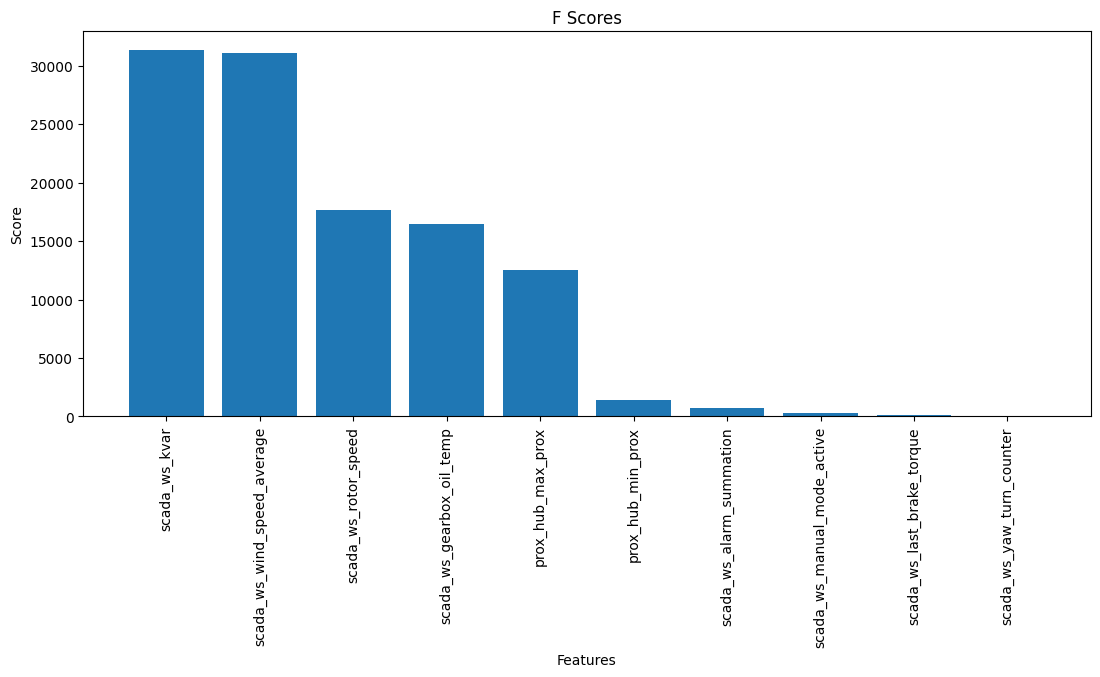

In [ ]:
scores,fscore_columns=zip(*sorted(list(zip(f_scores,x_corr_train.columns)),reverse=True))
fig, ax = plt.subplots(figsize = (13,5))
ax.bar(fscore_columns,scores)
ax.set_xticks(range(0,10),fscore_columns,rotation=90)
ax.set_xlabel("Features")
ax.set_ylabel("Score")
ax.set_title("F Scores")
plt.show()

In [ ]:
kbest_columns = fscore_columns[:5]
kbest_columns

('scada_ws_kvar',
 'scada_ws_wind_speed_average',
 'scada_ws_rotor_speed',
 'scada_ws_gearbox_oil_temp',
 'prox_hub_max_prox')

In [ ]:
# selecting the 5 best columns
x_kbest_train = x_corr_train[list(kbest_columns)]

In [ ]:
x_kbest_train

,scada_ws_kvar,scada_ws_wind_speed_average,scada_ws_rotor_speed,scada_ws_gearbox_oil_temp,prox_hub_max_prox
0,-0.393098,0.548858,0.650541,1.155335,0.837553
1,1.245029,-1.450768,-1.817170,0.156328,-2.928364
2,-0.883554,-0.384300,0.629225,0.264554,0.597494
3,-0.746227,0.815475,0.652181,0.897258,0.927575
4,0.627053,-0.517609,0.506250,-0.542977,0.522476
...,...,...,...,...,...
63003,1.245029,-0.717571,-0.239803,-0.867655,0.477465
63004,-0.402907,0.782148,0.653820,0.988834,0.852556
63005,-0.530425,0.615513,0.645622,-0.984205,0.912571
63006,-0.324434,0.482204,0.647262,0.081402,0.852556


In [ ]:
x_final_train = x_kbest_train.copy()

In [ ]:
# selecting the kbest for test data
x_kbest_test = x_corr_test[list(kbest_columns)]
x_final_test = x_kbest_test.copy()

#Modelling

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import pickle


##Random Forest

In [ ]:
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [ ]:

rf=RandomForestRegressor()
params = {'criterion':['squared_error'],
          'n_estimators':[1,2,3,4,5,6,7,8,9,10],
          'max_depth':range(3,10),
          'min_samples_leaf':[3,4],
          'min_samples_split':[6,7],
          'random_state':[123],
          'n_jobs':[-1]}

model_rf = GridSearchCV(rf, param_grid=params, n_jobs=-1,cv=10)
model_rf.fit(x_final_train,y_train)
print("Best Hyper Parameters:\n",model_rf.best_params_)

Best Hyper Parameters:
 {'criterion': 'squared_error', 'max_depth': 9, 'min_samples_leaf': 4, 'min_samples_split': 6, 'n_estimators': 10, 'n_jobs': -1, 'random_state': 123}


In [ ]:
model_rf.cv_results_

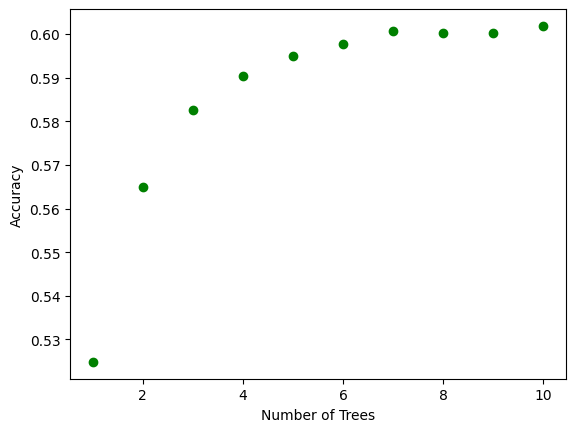

In [ ]:
mean_test_score=model_rf.cv_results_['mean_test_score'][:-1]
params=model_rf.cv_results_['params']
n_estimators=[x['n_estimators'] if(x['min_samples_split']==6 and x['max_depth']==9 and x['min_samples_leaf']==4) else np.nan for x in params]
n_estimators
plt.scatter(n_estimators[:-1],mean_test_score,color='green')
plt.xlabel("Number of Trees")
plt.ylabel("Accuracy")
plt.show()

In [ ]:
best_model_rf = model_rf.best_estimator_
y_pred = best_model_rf.predict(x_final_test)
mse = mean_squared_error(y_test, y_pred)

In [ ]:
mse

9225.035564642123

(0.0, 2500.0)

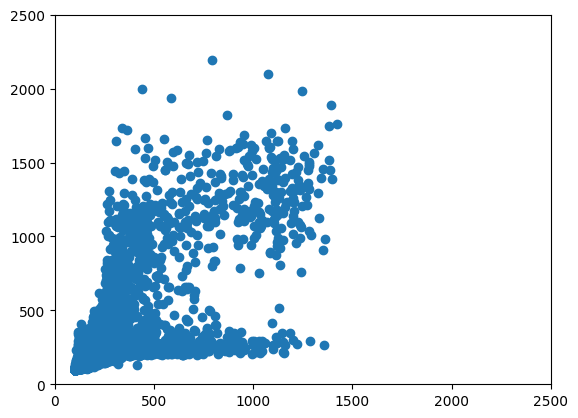

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(y_pred,y_test)
plt.xlim(0, 2500)
plt.ylim(0, 2500)

In [ ]:
from bokeh.plotting import figure, show
import bokeh.io
bokeh.io.output_notebook()
f=figure(height=600,width=600)
f.circle(y_pred,y_test, size=5, color="navy", alpha=0.5)
show(f)

In [ ]:
metric_df = pd.DataFrame({'y_pred':y_pred,'y_test':y_test.values})
metric_df['diff'] = np.abs(metric_df['y_pred']-metric_df['y_test'])
metric_df.describe()

,y_pred,y_test,diff
count,31034.000000,31034.000000,31034.000000
mean,218.043885,218.750746,37.345674
std,115.680264,150.499634,88.490613
min,101.369363,97.540000,0.000395
25%,127.772155,115.520000,2.593802
50%,234.355586,217.290000,14.198422
75%,258.329323,252.710000,33.916877
max,1424.106297,2193.350000,1559.852312


In [ ]:
# save the model

with open('/content/drive/MyDrive/Works/Iceni/ML/SavedModels/ML/RandomForest/rf_model.pkl','wb') as f:
    pickle.dump(best_model_rf,f)

###Load the model

In [ ]:
with open('/content/drive/MyDrive/Works/Iceni/ML/SavedModels/ML/RandomForest/model.pkl', 'rb') as f:
    model = pickle.load(f)

In [ ]:
model

RandomForestRegressor(max_depth=9, min_samples_leaf=4, min_samples_split=6,
                      n_estimators=10, n_jobs=-1, random_state=123)

###Testing with real Data

In [ ]:
import pandas as pd
import pickle

In [ ]:
test_df = pd.read_csv('/content/drive/MyDrive/Works/Iceni/Data/131_test.csv')
test_df = test_df[['vib_frame_accel','scada_ws_kvar','scada_ws_wind_speed_average','scada_ws_rotor_speed',
 'scada_ws_gearbox_oil_temp',
 'prox_hub_max_prox']]


In [ ]:
test_df.describe()

,vib_frame_accel,scada_ws_kvar,scada_ws_wind_speed_average,scada_ws_rotor_speed,scada_ws_gearbox_oil_temp,prox_hub_max_prox
count,4242.000000,4243.000000,4249.000000,4247.000000,4243.000000,4243.000000
mean,215.183777,-11.705680,3.928030,106.740452,35.551449,6.924318
std,131.561835,10.089515,2.768439,63.488617,14.753335,0.615525
min,97.370000,-37.500000,0.000000,0.000000,4.900000,4.840000
25%,105.560000,-18.700000,2.100000,43.850000,30.900000,6.910000
50%,203.250000,-15.500000,3.400000,149.800000,38.700000,7.140000
75%,253.790000,0.000000,5.000000,150.200000,44.400000,7.310000
max,1117.090000,0.100000,17.200000,151.900000,62.500000,7.740000


In [ ]:
test_df = test_df.dropna(axis=0)

In [ ]:
test_df_y = test_df['vib_frame_accel']
test_df_x = test_df[['scada_ws_kvar','scada_ws_wind_speed_average','scada_ws_rotor_speed','scada_ws_gearbox_oil_temp','prox_hub_max_prox']]

In [ ]:
test_df_x.describe()

,scada_ws_kvar,scada_ws_wind_speed_average,scada_ws_rotor_speed,scada_ws_gearbox_oil_temp,prox_hub_max_prox
count,4242.000000,4242.000000,4242.000000,4242.000000,4242.000000
mean,-11.708439,3.932414,106.866266,35.553253,6.924250
std,10.089103,2.768468,63.420093,14.754607,0.615582
min,-37.500000,0.000000,0.000000,4.900000,4.840000
25%,-18.700000,2.100000,47.125000,30.925000,6.910000
50%,-15.500000,3.400000,149.800000,38.700000,7.140000
75%,0.000000,5.000000,150.200000,44.400000,7.310000
max,0.100000,17.200000,151.900000,62.500000,7.740000


In [ ]:
# Load the Scaler
with open('/content/drive/MyDrive/Works/Iceni/ML/SavedModels/ML/RandomForest/rf_scaler.pkl', 'rb') as f:
    ss = pickle.load(f)

In [ ]:
# loadint the RF model
with open('/content/drive/MyDrive/Works/Iceni/ML/SavedModels/ML/RandomForest/rf_model.pkl', 'rb') as f:
    rf_model = pickle.load(f)

In [ ]:
test_df_x_scaled = pd.DataFrame(ss.transform(test_df_x),columns=test_df_x.columns)

In [ ]:
test_df_x_scaled

,scada_ws_kvar,scada_ws_wind_speed_average,scada_ws_rotor_speed,scada_ws_gearbox_oil_temp,prox_hub_max_prox
0,1.245029,-1.284132,-1.81717,-3.048820,-1.833097
1,1.245029,-1.317459,-1.81717,-3.048820,-1.833097
2,1.245029,-1.250805,-1.81717,-3.048820,-1.848101
3,1.245029,-1.284132,-1.81717,-3.057145,-1.848101
4,1.245029,-1.317459,-1.81717,-3.057145,-1.833097
...,...,...,...,...,...
4237,1.245029,-1.117497,-1.81717,-1.208982,1.032600
4238,1.245029,-1.384113,-1.81717,-1.233957,1.032600
4239,1.245029,-1.284132,-1.81717,-1.267257,1.032600
4240,1.245029,-1.184151,-1.81717,-1.308883,1.032600


In [ ]:
test_pred = rf_model.predict(test_df_x_scaled)

In [ ]:
from bokeh.plotting import figure, show
import bokeh.io
bokeh.io.output_notebook()
f=figure(height=600,width=600)
f.circle(test_pred,test_df_y, size=5, color="navy", alpha=0.5)
show(f)

In [ ]:
pd.DataFrame({'pred':test_pred,'true':test_df_y})

,pred,true
0,101.369363,99.83
1,101.369363,99.08
2,101.369363,101.02
3,101.369363,99.83
4,101.369363,101.10
...,...,...
4237,104.248139,102.54
4238,104.248139,103.81
4239,104.143240,102.27
4240,104.143240,102.88


In [ ]:
test_df_y

0        99.83
1        99.08
2       101.02
3        99.83
4       101.10
         ...  
4237    102.54
4238    103.81
4239    102.27
4240    102.88
4241    101.01
Name: vib_frame_accel, Length: 4242, dtype: float64

In [ ]:
test_pred = pd.Series(test_pred)

In [ ]:
from bokeh.plotting import figure, show
import bokeh.io
bokeh.io.output_notebook()
f=figure(height=600,width=1400)
f.line(test_df_y.index,test_df_y,color="navy", alpha=0.5,)
f.line(test_pred.index,test_pred+20,color="red", alpha=0.5)
show(f)

##Polynomial Regression

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error

In [ ]:
poly_reg = make_pipeline(PolynomialFeatures(), LinearRegression())
param_grid = {'polynomialfeatures__degree': np.arange(1, 10)}
grid_search = GridSearchCV(poly_reg, param_grid, cv=5)
grid_search.fit(x_final_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('linearregression',
                                        LinearRegression())]),
             param_grid={'polynomialfeatures__degree': array([1, 2, 3, 4, 5, 6, 7, 8, 9])})

In [ ]:
grid_search.cv_results_

{'mean_fit_time': array([2.65988350e-02, 9.26059723e-02, 2.20775127e-01, 7.28185797e-01,
        1.64354243e+00, 2.79250793e+00, 5.67812057e+00, 1.31275776e+01,
        2.68652923e+01]),
 'std_fit_time': array([0.01288369, 0.02598395, 0.0187551 , 0.02163893, 0.18783758,
        0.40249456, 0.59799691, 2.30087729, 2.4706508 ]),
 'mean_score_time': array([0.00275807, 0.00785918, 0.01175694, 0.02537184, 0.06205812,
        0.07064643, 0.10047936, 0.14214649, 0.23802266]),
 'std_score_time': array([9.74940652e-05, 2.42278768e-03, 1.45482934e-03, 1.62572135e-03,
        1.49184079e-02, 1.27304417e-02, 1.14875391e-02, 1.59792198e-02,
        6.27524761e-02]),
 'param_polynomialfeatures__degree': masked_array(data=[1, 2, 3, 4, 5, 6, 7, 8, 9],
              mask=[False, False, False, False, False, False, False, False,
                    False],
        fill_value='?',
             dtype=object),
 'params': [{'polynomialfeatures__degree': 1},
  {'polynomialfeatures__degree': 2},
  {'polynomial

In [ ]:
best_model_poly = grid_search.best_estimator_

In [ ]:
y_pred = best_model_poly.predict(x_final_train)
mse = mean_squared_error(y_train, y_pred)

In [ ]:
mse

10121.226895901027

(0.0, 3000.0)

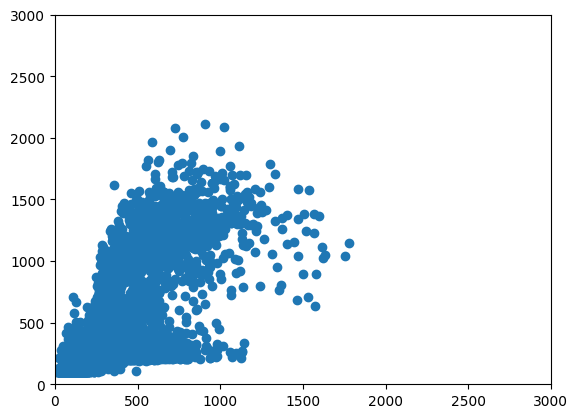

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(y_pred,y_train)
plt.xlim(0, 3000)
plt.ylim(0, 3000)

In [ ]:
y_test

35033    246.44
11188    271.36
6848     105.46
37767    243.45
43820    243.05
          ...  
71387    209.58
67010    100.25
61596    182.35
9059     237.03
16912    282.44
Name: vib_frame_accel, Length: 31034, dtype: float64

In [ ]:
y_pred

array([252.46563428, 253.48299167, 116.42343697, ..., 199.29324325,
       283.04800594, 271.27494055])

In [ ]:
pd.DataFrame({'y_pred':y_pred,'y_test':y_test.values})

##Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV




In [ ]:
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100,1000]}

ridge_reg = Ridge()
grid_search = GridSearchCV(ridge_reg, param_grid, scoring='neg_mean_squared_error', cv=10)
grid_search.fit(x_final_train, y_train)


GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
             scoring='neg_mean_squared_error')

In [ ]:
grid_search.best_params_
# grid_search.cv_results_

{'alpha': 100}

In [ ]:
best_model_poly = grid_search.best_estimator_
y_pred = best_model_poly.predict(x_final_train)
mse = mean_squared_error(y_train, y_pred)
mse

14151.558817494113

(0.0, 3000.0)

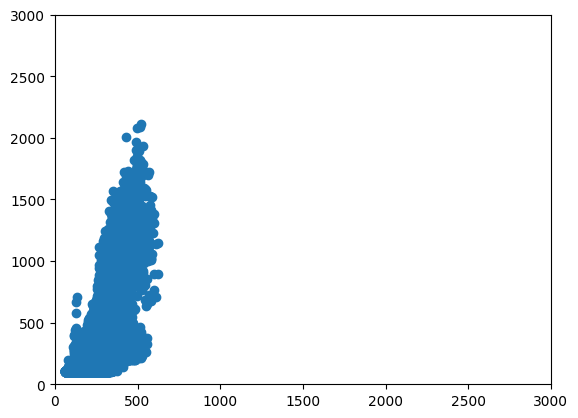

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(y_pred,y_train)
plt.xlim(0, 3000)
plt.ylim(0, 3000)

##Lasso Regression

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV




In [ ]:
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100,1000]}

lasso_reg = Lasso()
grid_search = GridSearchCV(lasso_reg, param_grid, scoring='neg_mean_squared_error', cv=10)
grid_search.fit(x_final_train, y_train)


GridSearchCV(cv=10, estimator=Lasso(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
             scoring='neg_mean_squared_error')

In [ ]:
grid_search.best_params_
# grid_search.cv_results_

{'alpha': 0.1}

In [ ]:
best_model_poly = grid_search.best_estimator_
y_pred = best_model_poly.predict(x_final_train)
mse = mean_squared_error(y_train, y_pred)
mse

14151.559083465772

(0.0, 1000.0)

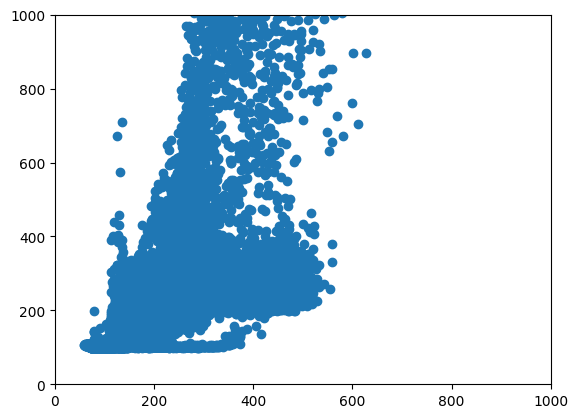

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(y_pred,y_train)
plt.xlim(0, 1000)
plt.ylim(0, 1000)

##Quantile Regression

In [ ]:
from sklearn.linear_model import QuantileRegressor


In [ ]:
quantiles = [0.05, 0.5, 0.95]
qr = QuantileRegressor(quantile=quantiles, alpha=0, solver='highs')

#rough

In [ ]:
from bokeh.plotting import figure, show
from bokeh.models import Range1d, CustomJS

# Sample data
x = [1, 2, 3, 4, 5]
y = [6, 7, 2, 4, 5]

# Create a figure
p = figure(title="Example Plot", x_axis_label='X-axis', y_axis_label='Y-axis', tools='box_select')

# Plot the data
line = p.line(x, y)

# Set the x_range
x_range = Range1d(start=min(x), end=max(x))
p.x_range = x_range

# Create a Selected model
selected = line.data_source.selected

# JavaScript callback to handle selection
callback = CustomJS(args=dict(selected=selected, source=line.data_source), code="""
    var selected_indices = selected.indices;
    var selected_x_values = selected_indices.map(function(i) {
        return source.data['x'][i];
    });
    console.log("Selected X-values:", selected_x_values);
""")

# Attach the JavaScript callback to the Selected model
line.js_on_event('selectiongeometry', callback)

# Show the plot
show(p)


In [ ]:
from bokeh.plotting import figure, show,output_notebook
from bokeh.models import Range1d, TapTool, CustomJS
output_notebook()

# Sample data
x = [1, 2, 3, 4, 5]
y = [6, 7, 2, 4, 5]

# Create a figure
p = figure(title="Example Plot", x_axis_label='X-axis', y_axis_label='Y-axis', tools='tap')

# Plot the data
line = p.line(x, y)

# Set the x_range
x_range = Range1d(start=min(x), end=max(x))
p.x_range = x_range

# Create a TapTool
tap = TapTool(callback=CustomJS(code="console.log('Point selected at index:', cb_obj.indices[0]);"))

# Add the TapTool to the plot
p.add_tools(tap)

# Show the plot
show(p)